In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('cleaned_apartments.csv')

In [3]:
df.head()

,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,square_feet,cityname,state,latitude,longitude
0,"AC,Cable or Satellite,Clubhouse,Dishwasher,Ele...",2,2,USD,0,0,yes,1920.0,"$1,920",3,Other,GA,34.0648,-84.0849
1,"AC,Cable or Satellite,Clubhouse,Gated,Gym,Inte...",1,1,USD,0,0,yes,973.0,$973,3,Other,LA,32.4544,-93.7135
2,NaN,1,1,USD,0,0,yes,1585.0,"$1,585",1,Los Angeles,CA,34.0372,-118.2972
3,"Cable or Satellite,Clubhouse,Dishwasher,Gated,...",1,1,USD,0,0,yes,950.0,$950,2,Other,TX,27.8689,-97.2057
4,"Parking,Pool,Tennis",1,2,USD,0,0,no,1275.0,"$1,275",3,Other,Other,41.7588,-72.6148


In [4]:
df=df.drop(columns=['currency','price_display'])

In [5]:
df['latitude']=df['latitude'].fillna(df['latitude'].mean())
df['longitude']=df['longitude'].fillna(df['longitude'].mean())

In [6]:
df['bathrooms'].value_counts()

,count
bathrooms,
1,62877
2,42384
3,3457
4,439
5,251


In [7]:
df['bathrooms'].value_counts()

,count
bathrooms,
1,62877
2,42384
3,3457
4,439
5,251


In [8]:
print(sum(df['amenities'].value_counts()>400))

22


In [9]:

top_amenities = df['amenities'].value_counts()[df['amenities'].value_counts() > 400].index
df['amenities'] = df['amenities'].apply(
    lambda x: x if x in top_amenities else 'Other'
)

df_formodel=df

In [10]:
df['amenities'].value_counts()

,count
amenities,
Other,85762
Parking,6404
"Parking,Storage",2181
"Gym,Pool",1925
Pool,1654
"Gym,Parking,Pool",1239
"Parking,Pool",977
Washer Dryer,861
Patio/Deck,806


In [11]:
df.to_csv('part2cleaned.csv',index=False)

In [12]:
df.shape

(109408, 12)

In [13]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109408 entries, 0 to 109407
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   amenities     109408 non-null  object 
 1   bathrooms     109408 non-null  int64  
 2   bedrooms      109408 non-null  int64  
 3   fee           109408 non-null  int64  
 4   has_photo     109408 non-null  int64  
 5   pets_allowed  109408 non-null  object 
 6   price         109408 non-null  float64
 7   square_feet   109408 non-null  int64  
 8   cityname      109408 non-null  object 
 9   state         109408 non-null  object 
 10  latitude      109408 non-null  float64
 11  longitude     109408 non-null  float64
dtypes: float64(3), int64(5), object(4)
memory usage: 10.0+ MB


In [14]:

df.describe()


,bathrooms,bedrooms,fee,has_photo,price,square_feet,latitude,longitude
count,109408.000000,109408.000000,109408.000000,109408.000000,109408.000000,109408.000000,109408.000000,109408.000000
mean,1.471803,1.745896,0.002258,0.086164,1523.036917,2.640986,37.016215,-91.845165
std,0.603331,0.784006,0.047461,0.280607,921.354804,1.453202,4.692712,15.832517
min,1.000000,1.000000,0.000000,0.000000,100.000000,0.000000,19.573800,-159.369800
25%,1.000000,1.000000,0.000000,0.000000,1001.000000,2.000000,33.746500,-104.781100
50%,1.000000,2.000000,0.000000,0.000000,1349.000000,2.000000,37.338200,-85.909900
75%,2.000000,2.000000,0.000000,0.000000,1786.000000,4.000000,40.034100,-78.463600
max,5.000000,7.000000,1.000000,1.000000,52500.000000,6.000000,64.833200,-68.778800


In [15]:

df.describe(include="object")


,amenities,pets_allowed,cityname,state
count,109408,109408,109408,109408
unique,23,4,29,21
top,Other,no,Other,Other
freq,85762,64513,78419,14862


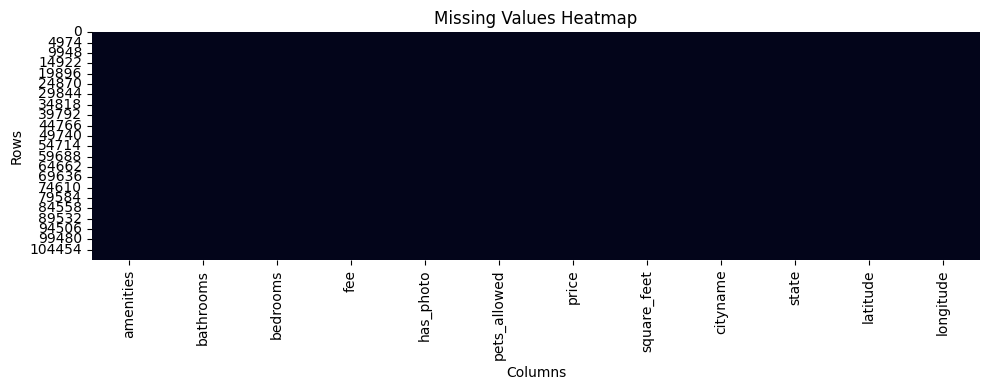

In [16]:
# Missing values heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(df.isna(), cbar=False)
plt.title("Missing Values Heatmap")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.tight_layout()
plt.show()


with targret variable cheaking important features

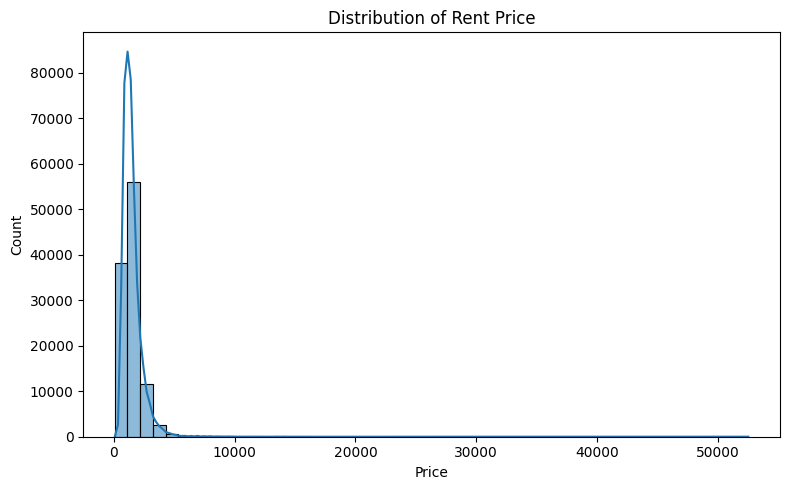

In [17]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="price", kde=True, bins=50)
plt.title("Distribution of Rent Price")
plt.xlabel("Price")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


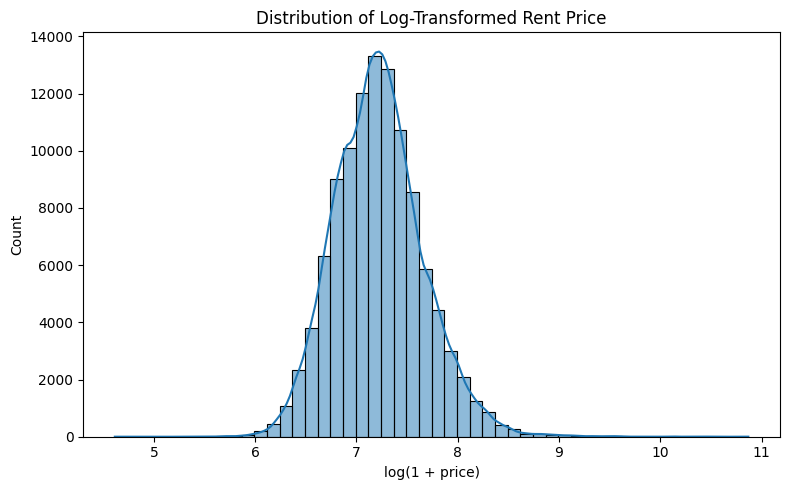

In [18]:
df["log_price"] = np.log1p(df["price"])

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="log_price", kde=True, bins=50)
plt.title("Distribution of Log-Transformed Rent Price")
plt.xlabel("log(1 + price)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


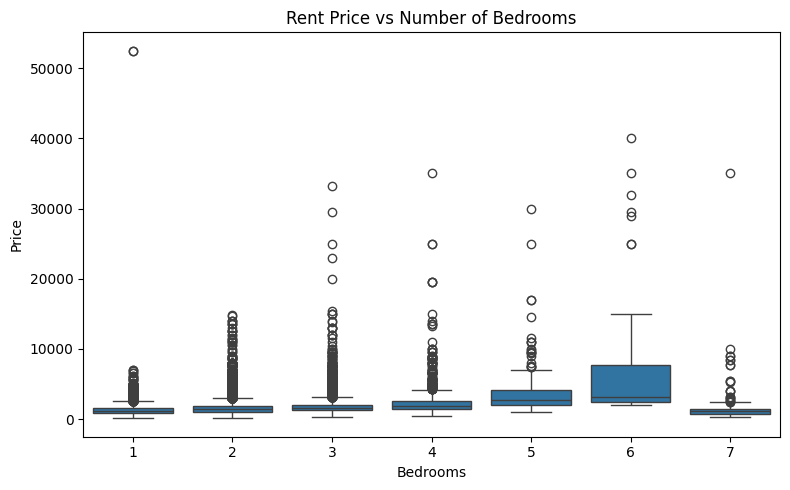

In [19]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="bedrooms", y="price")
plt.title("Rent Price vs Number of Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


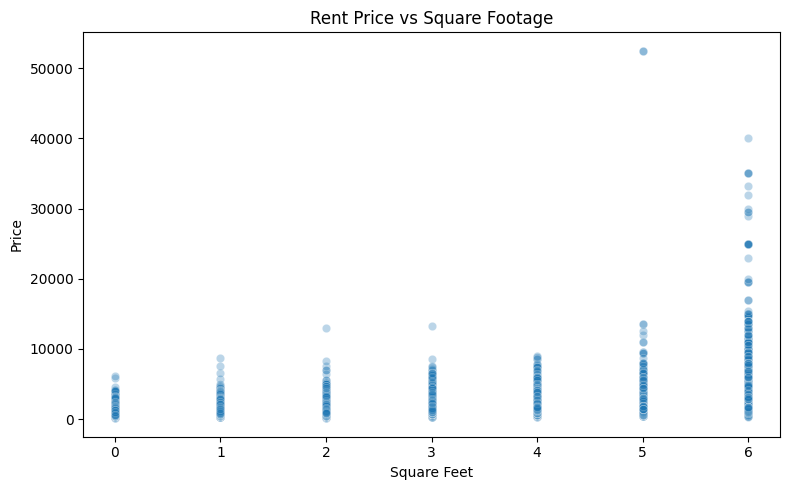

In [20]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="square_feet", y="price", alpha=0.3)
plt.title("Rent Price vs Square Footage")
plt.xlabel("Square Feet")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


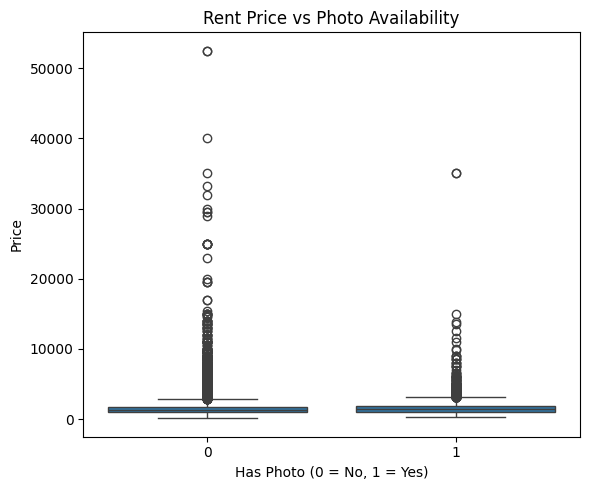

In [21]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x="has_photo", y="price")
plt.title("Rent Price vs Photo Availability")
plt.xlabel("Has Photo (0 = No, 1 = Yes)")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


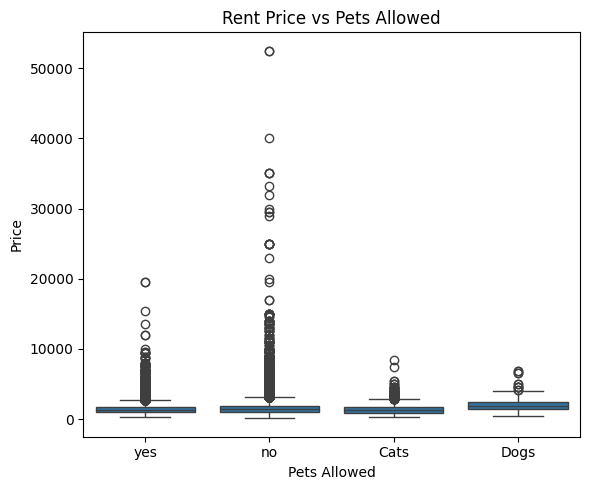

In [22]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x="pets_allowed", y="price")
plt.title("Rent Price vs Pets Allowed")
plt.xlabel("Pets Allowed")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


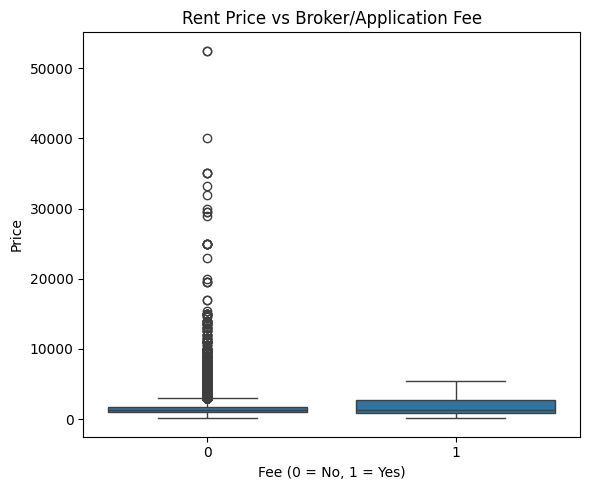

In [23]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x="fee", y="price")
plt.title("Rent Price vs Broker/Application Fee")
plt.xlabel("Fee (0 = No, 1 = Yes)")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


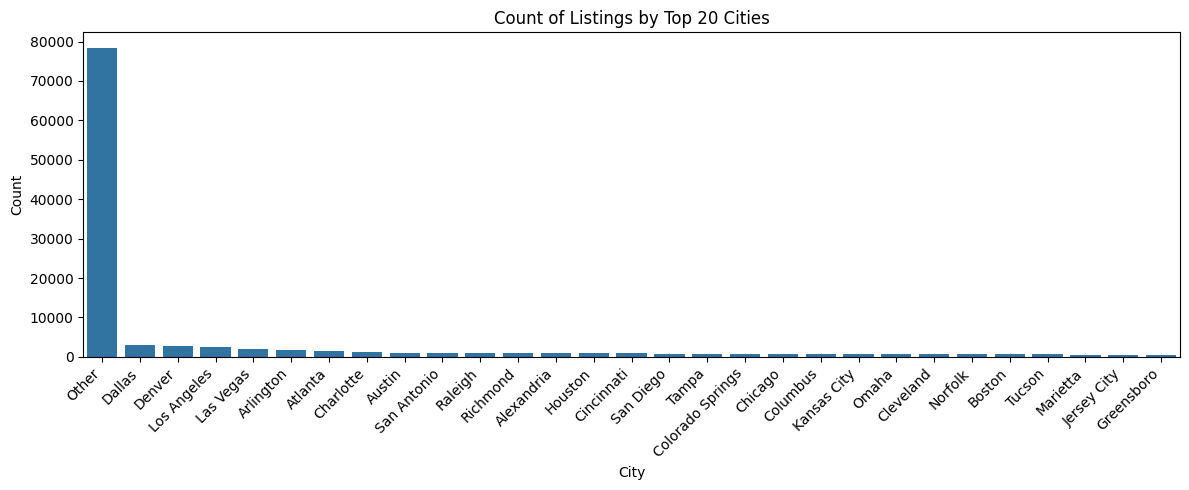

In [24]:
plt.figure(figsize=(12, 5))
city_order = df["cityname"].value_counts().index

sns.countplot(data=df, x="cityname", order=city_order)
plt.title("Count of Listings by Top 20 Cities")
plt.xlabel("City")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [25]:
df.columns

Index(['amenities', 'bathrooms', 'bedrooms', 'fee', 'has_photo',
       'pets_allowed', 'price', 'square_feet', 'cityname', 'state', 'latitude',
       'longitude', 'log_price'],
      dtype='object')

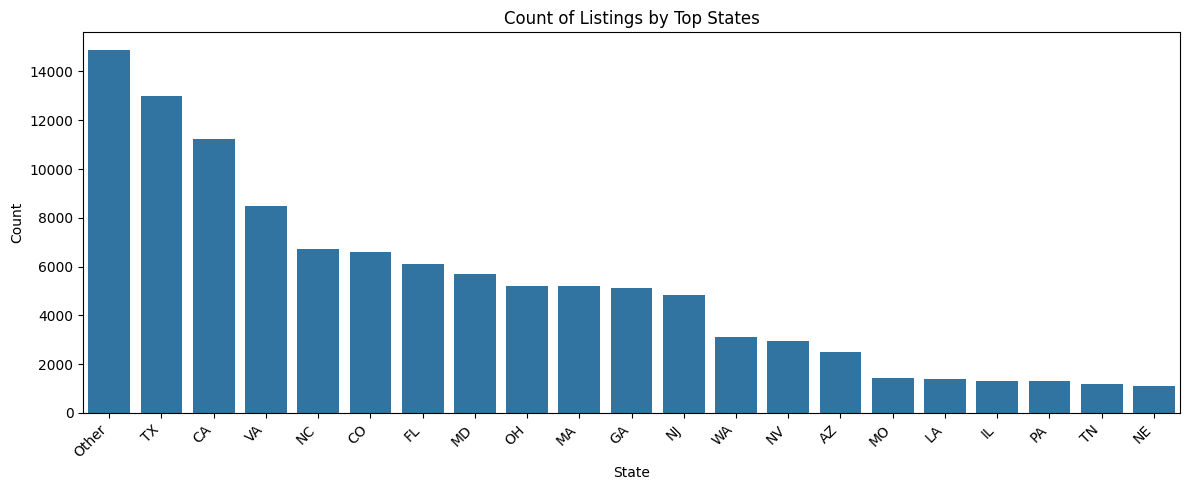

In [26]:
plt.figure(figsize=(12, 5))
state_order = df["state"].value_counts().index

sns.countplot(data=df, x="state", order=state_order)
plt.title("Count of Listings by Top States")
plt.xlabel("State")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


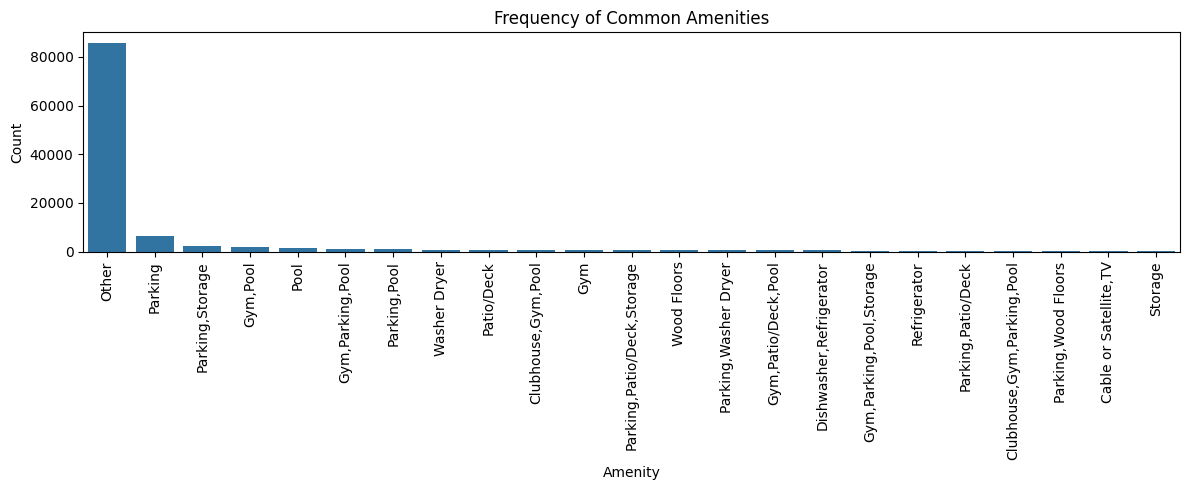

In [27]:
plt.figure(figsize=(12, 5))
amenity_order = df["amenities"].value_counts().index[:25]

sns.countplot(data=df, x="amenities", order=amenity_order)
plt.title("Frequency of Common Amenities")
plt.xlabel("Amenity")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


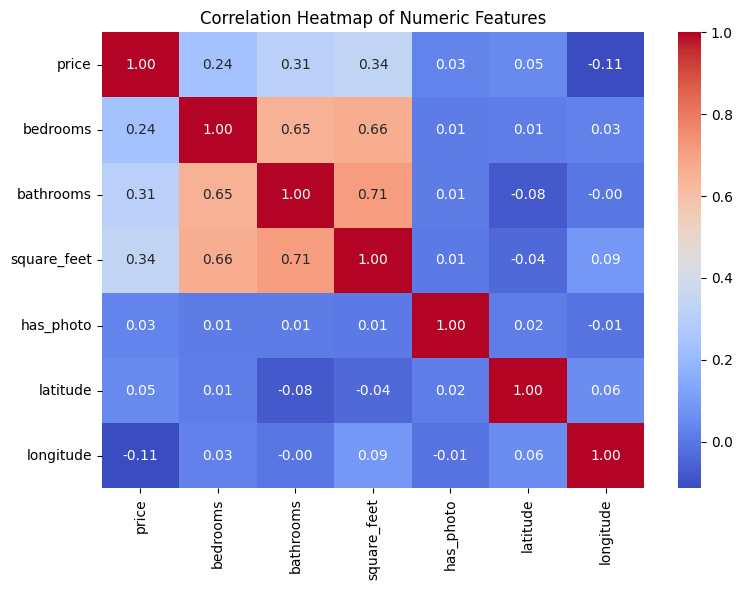

In [28]:
numeric_cols = ["price", "bedrooms", "bathrooms", "square_feet",
                "has_photo", "latitude", "longitude"]

corr = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()


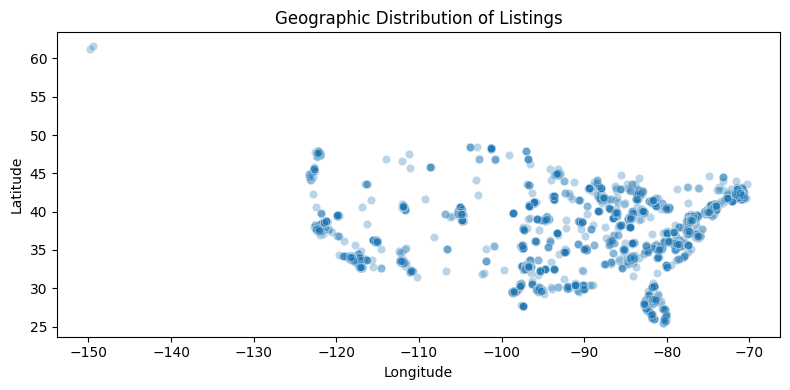

In [29]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df.sample(5000, random_state=42), x="longitude", y="latitude", alpha=0.3)
plt.title("Geographic Distribution of Listings")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()


In [30]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"{column} IQR bounds:")
    print(f"Lower: {lower_bound}, Upper: {upper_bound}")

    df_clean = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    print(f"Removed {len(df) - len(df_clean)} outliers from {column}")
    return df_clean


In [31]:
df = remove_outliers_iqr(df, "price")
df = remove_outliers_iqr(df, "square_feet")
df = remove_outliers_iqr(df, "price")
df = remove_outliers_iqr(df, "price")
df = remove_outliers_iqr(df, "price")
df = remove_outliers_iqr(df, "price")
df = remove_outliers_iqr(df, "price")

price IQR bounds:
Lower: -176.5, Upper: 2963.5
Removed 5244 outliers from price
square_feet IQR bounds:
Lower: 0.5, Upper: 4.5
Removed 14542 outliers from square_feet
price IQR bounds:
Lower: -30.0, Upper: 2674.0
Removed 1830 outliers from price
price IQR bounds:
Lower: -9.0, Upper: 2615.0
Removed 433 outliers from price
price IQR bounds:
Lower: 0.0, Upper: 2600.0
Removed 81 outliers from price
price IQR bounds:
Lower: 1.5, Upper: 2597.5
Removed 125 outliers from price
price IQR bounds:
Lower: 7.5, Upper: 2587.5
Removed 126 outliers from price


In [32]:
from sklearn.preprocessing import LabelEncoder

le_model_for_pets_allowed_or_not = LabelEncoder()

df['pets_allowed'] = le_model_for_pets_allowed_or_not.fit_transform(df['pets_allowed'])

print("Classes learned:", le_model_for_pets_allowed_or_not.classes_)


Classes learned: ['Cats' 'Dogs' 'no' 'yes']


In [33]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['price'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [34]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

onehot_cols = ['cityname', 'state', 'amenities']

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), onehot_cols)
    ],
    remainder='passthrough'
)


In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])


In [36]:
pipline_model=pipeline.fit(X_train, y_train)


In [37]:
pipline_model.score(X_test,y_test)


0.9630487281875002

In [38]:
pipline_model.score(X_train,y_train)

0.9629325030155932

In [39]:
from sklearn.ensemble import RandomForestRegressor
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=300,max_depth=None,min_samples_split=2,min_samples_leaf=1,random_state=42,n_jobs=-1))
])
rf_pipeline.fit(X_train, y_train)

print("Train R²:", rf_pipeline.score(X_train, y_train))
print("Test R²:", rf_pipeline.score(X_test, y_test))



Train R²: 0.999999795629902
Test R²: 0.9999996404884582


In [40]:
from sklearn.metrics import (
    r2_score,
    mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error
)
import numpy as np


In [41]:
y_pred = rf_pipeline.predict(X_test)
train_pred = rf_pipeline.predict(X_train)

In [42]:

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

mape = mean_absolute_percentage_error(y_test, y_pred) * 100


In [43]:
train_pred = rf_pipeline.predict(X_train)
train_r2 = r2_score(y_train, train_pred)
print("-------------------------------------")
print(f"Train R²: {train_r2:.4f}")
print(f"Test R²:  {r2:.4f}")


-------------------------------------
Train R²: 1.0000
Test R²:  1.0000


In [44]:
print(r2,mse,rmse,mae,mape)

0.9999996404884582 0.07620619508126467 0.2760546958145517 0.009264031500557634 0.0017103733001464334


In [45]:
import pickle

final_model_package = {
    "label_encoder_pets": le_model_for_pets_allowed_or_not,
    "pipeline": rf_pipeline
}


with open("rental_price_model.pkl", "wb") as f:
    pickle.dump(final_model_package, f)

print("Model + LabelEncoder saved successfully!")

Model + LabelEncoder saved successfully!
